<img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg">

* Autoencoding is a data compression technique.
* The compression & decompression functions are data-specific, lossy & learned automatically

* Not popular for data compression
* Good for dimensionality reduction
* Data denoising - Finding important information from data

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 32

In [3]:
input_img = Input(shape=(784,))

In [4]:
#encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [5]:
#decoded - reconstruction of its encoded representation
decoded = Dense(784, activation='sigmoid')(encoded)

In [6]:
#this model maps an input to its encoded representation
autoencoder = Model(input_img, decoded)

In [7]:
#seperate encoder model
encoder = Model(input_img, encoded)

In [8]:
#placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))

In [9]:
#retrive the last layer of the auto-encoder model
decoder_layer = autoencoder.layers[-1]

In [10]:
#create a decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [12]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 23s 378us/step - loss: 0.3666 - val_loss: 0.2723
Epoch 2/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.2654 - val_loss: 0.2550
Epoch 3/50
60000/60000 [==============================] - 20s 326us/step - loss: 0.2448 - val_loss: 0.2326
Epoch 4/50
60000/60000 [==============================] - 17s 285us/step - loss: 0.2247 - val_loss: 0.2147
Epoch 5/50
60000/60000 [==============================] - 15s 255us/step - loss: 0.2093 - val_loss: 0.2017
Epoch 6/50
60000/60000 [==============================] - 16s 270us/step - loss: 0.1982 - val_loss: 0.1921
Epoch 7/50
60000/60000 [==============================] - 16s 259us/step - loss: 0.1894 - val_loss: 0.1841
Epoch 8/50
60000/60000 [==============================] - 15s 249us/step - loss: 0.1820 - val_loss: 0.1774
Epoch 9/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.1758 - val_

In [17]:
encoded_imgs = encoder.predict(x_test)

In [18]:
decoded_imgs = decoder.predict(encoded_imgs)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

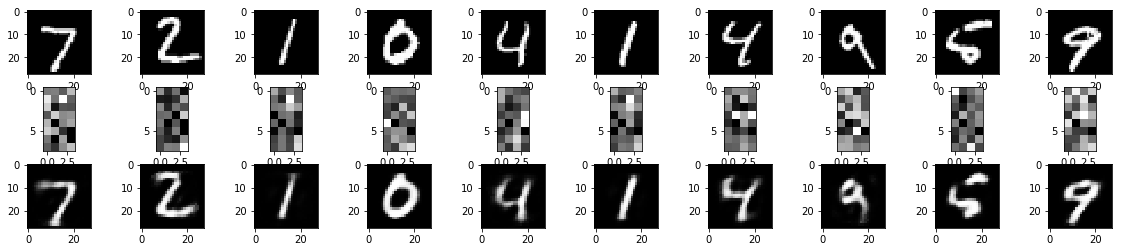

In [23]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4), cmap='gray')
    
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

#### Deep autoencoder

In [24]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [25]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.3455 - val_loss: 0.2641
Epoch 2/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.2590 - val_loss: 0.2531
Epoch 3/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.2430 - val_loss: 0.2296
Epoch 4/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.2216 - val_loss: 0.2129
Epoch 5/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.2106 - val_loss: 0.2041
Epoch 6/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.1968 - val_loss: 0.1889
Epoch 7/10
60000/60000 [==============================] - 31s 516us/step - loss: 0.1853 - val_loss: 0.1802
Epoch 8/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.1783 - val_loss: 0.1749
Epoch 9/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.1729 - val_

### Convolutional autoencoders

In [26]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [27]:
input_img = Input(shape=(28, 28, 1)) 

In [28]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [29]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [30]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [31]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [32]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [33]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 361s 6ms/step - loss: 0.2281 - val_loss: 0.1861
Epoch 2/10
60000/60000 [==============================] - 383s 6ms/step - loss: 0.1607 - val_loss: 0.1493
Epoch 3/10
60000/60000 [==============================] - 360s 6ms/step - loss: 0.1442 - val_loss: 0.1386
Epoch 4/10
60000/60000 [==============================] - 268s 4ms/step - loss: 0.1350 - val_loss: 0.1296
Epoch 5/10
60000/60000 [==============================] - 248s 4ms/step - loss: 0.1294 - val_loss: 0.1261
Epoch 6/10
60000/60000 [==============================] - 249s 4ms/step - loss: 0.1261 - val_loss: 0.1231
Epoch 7/10
60000/60000 [==============================] - 249s 4ms/step - loss: 0.1236 - val_loss: 0.1226
Epoch 8/10
60000/60000 [==============================] - 246s 4ms/step - loss: 0.1211 - val_loss: 0.1205
Epoch 9/10
60000/60000 [==============================] - 248s 4ms/step - loss: 0.1193 - val_loss: 0.1